In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page{i}")

    #Create URL to collect links from paignated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    #Collect HTML data from this page
    response = requests.get(url)

    #Parse Content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div",{"class": "text_content"}):
        reviews.append(para.get_text())
    

Scraping page1
Scraping page2
Scraping page3
Scraping page4
Scraping page5
Scraping page6
Scraping page7
Scraping page8
Scraping page9
Scraping page10
Scraping page11
Scraping page12
Scraping page13
Scraping page14
Scraping page15
Scraping page16
Scraping page17
Scraping page18
Scraping page19
Scraping page20
Scraping page21
Scraping page22
Scraping page23
Scraping page24
Scraping page25
Scraping page26
Scraping page27
Scraping page28
Scraping page29
Scraping page30
Scraping page31
Scraping page32
Scraping page33
Scraping page34
Scraping page35
Scraping page36
Scraping page37


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,"✅ Trip Verified | I had only 1 bag with me, ..."
1,✅ Trip Verified | Check in and security at T5 ...
2,Not Verified | LHR T5 BA Gold Wing worked wel...
3,Not Verified | Very good service on this rout...
4,✅ Trip Verified | Flight mainly let down by ...
...,...
3695,LHR-LAX and ORD-LHR. Great crew on both flight...
3696,I flew from Singapore to Heathrow on a B747 wh...
3697,BA2590 20 Aug LGW TO BRI. We checked in online...
3698,LHR-YYZ. Checked in at 10.00am for my 13.10 de...


In [6]:
df.to_csv("BA_reviews.csv")

In [7]:
reviews = pd.read_csv("BA_reviews.csv")
reviews = reviews.pop('reviews')
reviews

0       ✅ Trip Verified |   I had only 1 bag with me, ...
1       ✅ Trip Verified | Check in and security at T5 ...
2       Not Verified |  LHR T5 BA Gold Wing worked wel...
3       Not Verified |  Very good service on this rout...
4       ✅ Trip Verified |   Flight mainly let down by ...
                              ...                        
3695    LHR-LAX and ORD-LHR. Great crew on both flight...
3696    I flew from Singapore to Heathrow on a B747 wh...
3697    BA2590 20 Aug LGW TO BRI. We checked in online...
3698    LHR-YYZ. Checked in at 10.00am for my 13.10 de...
3699    I flew from London to Sydney Club World / Busi...
Name: reviews, Length: 3700, dtype: object

Cleaning text

In [9]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

In [10]:
reviews = reviews.str.replace('Trip Verified |', '')
reviews = reviews.str.replace('✅', '')
reviews = reviews.str.replace('|', '')
reviews = reviews.str.replace(r'\b(\w{1,3})\b', '')
reviews = reviews.apply(remove_punctuations)
reviews

0           I had only 1 bag with me a carry on trolle...
1         Check in and security at T5 quick Both Galle...
2       Not Verified   LHR T5 BA Gold Wing worked well...
3       Not Verified   Very good service on this route...
4           Flight mainly let down by a disagreeable f...
                              ...                        
3695    LHRLAX and ORDLHR Great crew on both flights T...
3696    I flew from Singapore to Heathrow on a B747 wh...
3697    BA2590 20 Aug LGW TO BRI We checked in online ...
3698    LHRYYZ Checked in at 1000am for my 1310 depart...
3699    I flew from London to Sydney Club World  Busin...
Name: reviews, Length: 3700, dtype: object

In [11]:
reviews.shape

(3700,)

In [16]:
freq_words = pd.Series([word for word in ' '.join(reviews).lower().split() if len(word) >= 4]).value_counts()[:50]
freq_words


flight        6721
with          5986
were          4534
that          4476
they          3718
this          3690
have          3418
from          3108
service       2863
very          2759
seat          2344
food          2280
british       2247
airways       2216
london        2189
crew          2124
seats         2072
time          2054
good          2030
cabin         1939
class         1919
which         1910
there         1787
when          1618
business      1608
staff         1567
would         1547
heathrow      1536
their         1536
only          1494
economy       1419
after         1302
first         1296
flights       1190
more          1162
been          1156
just          1111
other         1107
hours         1100
return        1096
back          1089
airline       1073
than          1071
verified      1071
club          1059
plane         1054
passengers    1050
again         1029
them          1029
even          1020
Name: count, dtype: int64

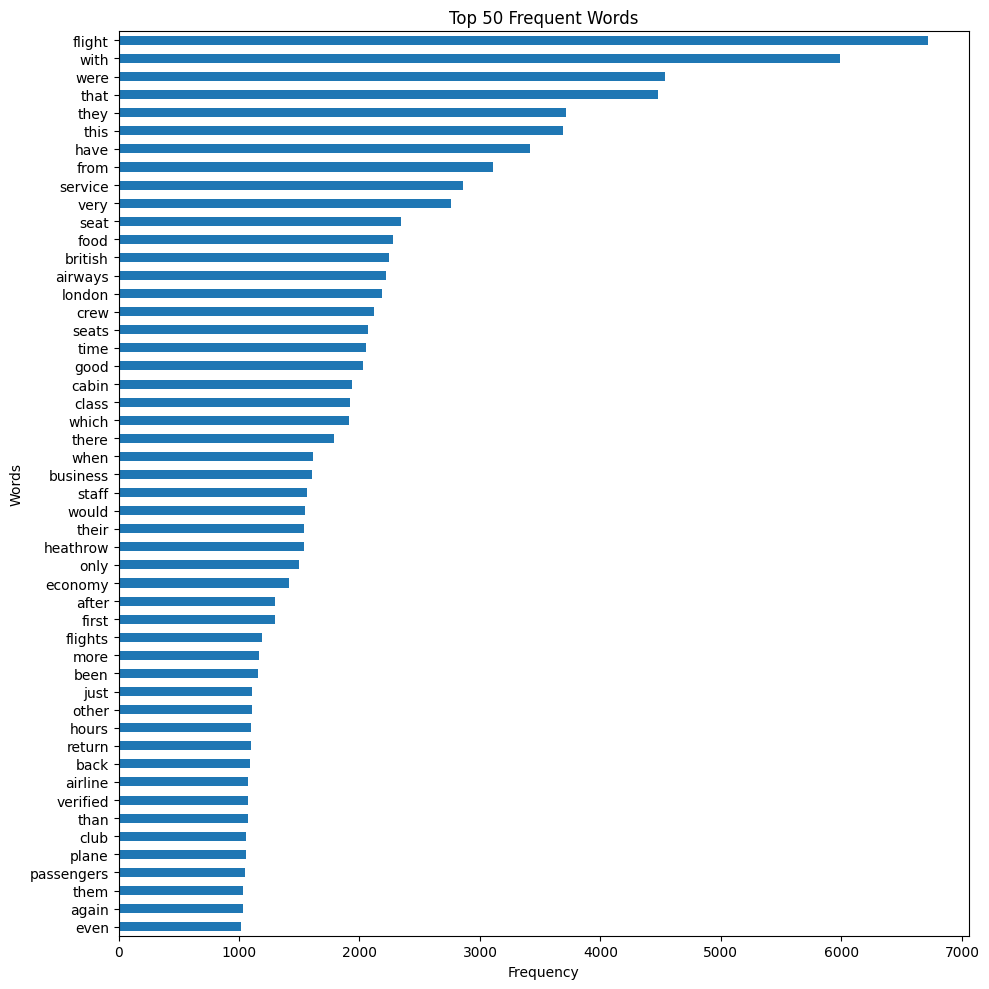

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
freq_words.sort_values().plot.barh()
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Frequent Words")
plt.tight_layout()
plt.show()


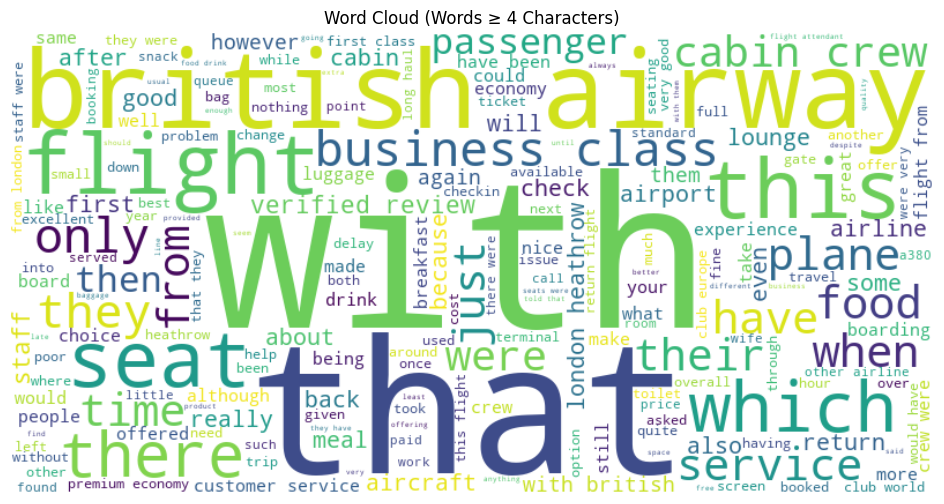

6721


In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one string and convert to lowercase
text = ' '.join(reviews).lower()

# Remove words less than 4 characters
filtered_words = ' '.join([word for word in text.split() if len(word) >= 4])

# Generate the word cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      stopwords='english',
                      max_words=200).generate(filtered_words)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Words ≥ 4 Characters)")
plt.show()
print(freq_words["flight"])


C:\Users\DELL\AppData\Local\Temp\ipykernel_19340\1087960972.py:51: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


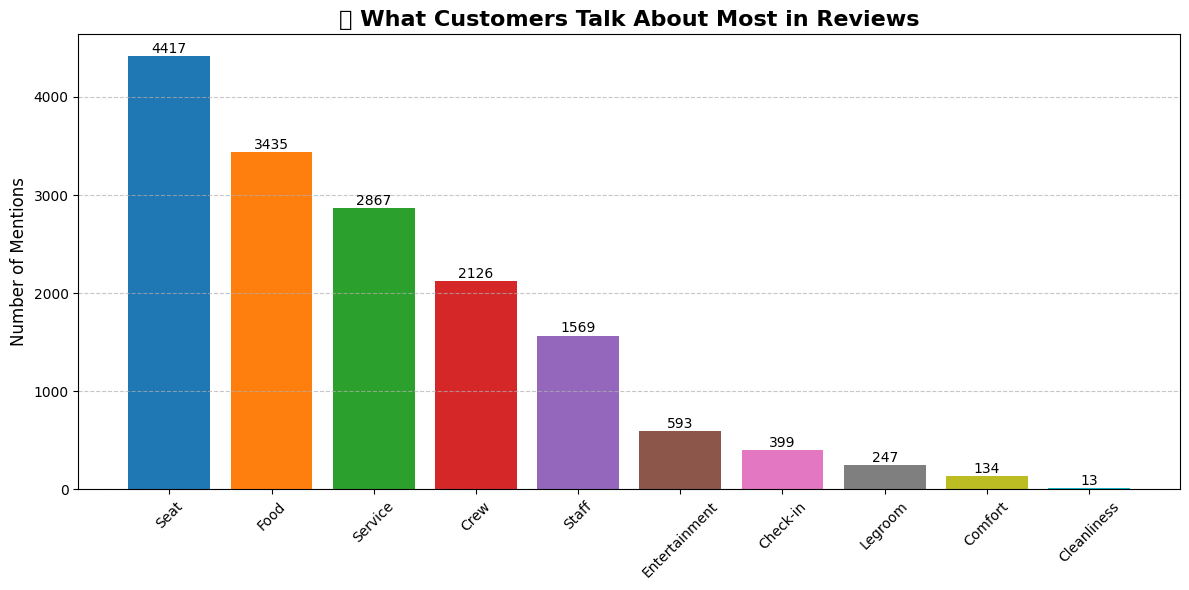

In [47]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import RegexpTokenizer

# Step 1: Tokenize and clean the reviews
tokenizer = RegexpTokenizer(r'\w+')
all_words = tokenizer.tokenize(' '.join(reviews).lower())

# Step 2: Define customer-centric keywords to look for
keywords = ['seat', 'seats', 'service', 'staff', 'food', 'meal', 'meals', 'crew', 
            'comfort', 'legroom', 'entertainment', 'cleanliness', 'checkin']

# Step 3: Count word frequencies
word_freq = Counter(all_words)

# Step 4: Group similar keywords
grouped_keywords = {
    'Seat': word_freq.get('seat', 0) + word_freq.get('seats', 0),
    'Service': word_freq.get('service', 0),
    'Food': word_freq.get('food', 0) + word_freq.get('meal', 0) + word_freq.get('meals', 0),
    'Staff': word_freq.get('staff', 0),
    'Crew': word_freq.get('crew', 0),
    'Comfort': word_freq.get('comfort', 0),
    'Legroom': word_freq.get('legroom', 0),
    'Entertainment': word_freq.get('entertainment', 0),
    'Cleanliness': word_freq.get('cleanliness', 0),
    'Check-in': word_freq.get('checkin', 0),
}

# Step 5: Sort the keywords
sorted_keywords = dict(sorted(grouped_keywords.items(), key=lambda x: x[1], reverse=True))

# 🎨 Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Step 6: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_keywords.keys(), sorted_keywords.values(), color=colors)

# Add frequency labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom', fontsize=10)

plt.title("🔍 What Customers Talk About Most in Reviews", fontsize=16, weight='bold')
plt.ylabel("Number of Mentions", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Text Clustering

In [20]:
categories = ['negative', 'positive']
num_cat = len(categories)
num_cat

2

Vectorizing the Data

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                              stop_words='english',
                              ngram_range=(1, 1),
                              tokenizer=tokenizer.tokenize)

# Fit and Transform Text Data
reviews_counts = tf_idf_vect.fit_transform(reviews)

# Check Shape of TF-IDF Matrix
reviews_counts.shape


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3700, 15430)

In [30]:
#Import KMeans Model
from sklearn.cluster import KMeans

#Create Kmeans object and fit it to the training data
kmeans = KMeans(n_clusters=num_cat).fit(reviews_counts)

#Get the labels using KMeans
pred_labels =kmeans.labels_
pred_labels

array([1, 0, 0, ..., 1, 0, 0], shape=(3700,), dtype=int32)

In [32]:
cluster_centres = kmeans.cluster_centers_
cluster_centres

array([[2.75097326e-04, 5.99925136e-05, 9.65202017e-05, ...,
        5.52747539e-05, 7.93309110e-05, 0.00000000e+00],
       [3.70881156e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.42529417e-05]], shape=(2, 15430))

In [33]:
unique, counts = np.unique(pred_labels, return_counts=True)
dict(zip(unique, counts))

{np.int32(0): np.int64(2474), np.int32(1): np.int64(1226)}

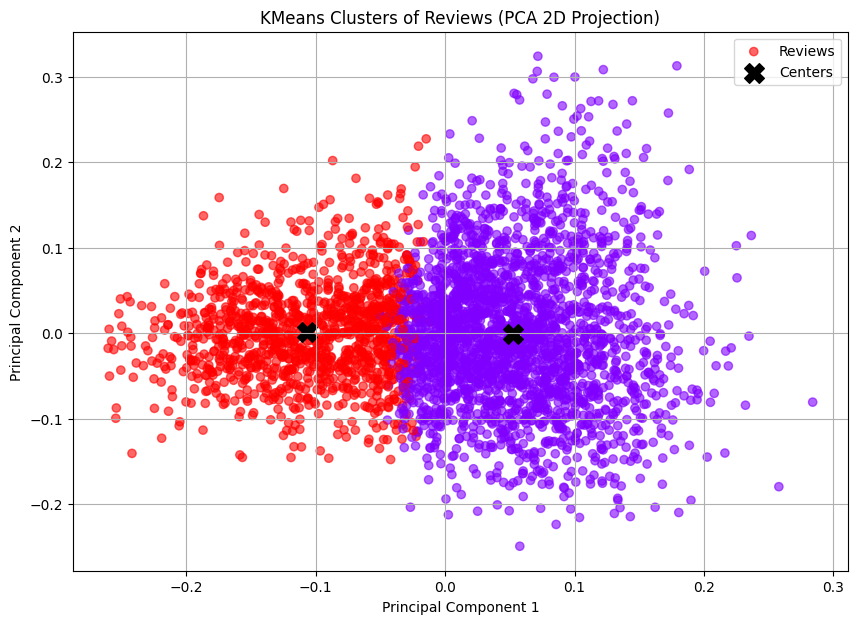

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Reduce dimensions of TF-IDF matrix
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(reviews_counts.toarray())  # Convert sparse to dense

# Step 2: Reduce dimensions of cluster centers
reduced_centers = pca.transform(kmeans.cluster_centers_)

# Step 3: Plot data points and cluster centers
plt.figure(figsize=(10, 7))

# Scatter plot of reviews, colored by cluster
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pred_labels, cmap='rainbow', alpha=0.6, label='Reviews')

# Mark cluster centers
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='X', s=200, label='Centers')

plt.title("KMeans Clusters of Reviews (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


Metrics

In [36]:
from sklearn import metrics

# Compute DBI score
dbi = metrics.davies_bouldin_score(reviews_counts.toarray(), pred_labels)

# Compute Silhouette score
ss = metrics.silhouette_score(reviews_counts.toarray(), pred_labels, metric='euclidean')

# Print the scores
print("DBI Score: ", dbi)
print("Silhouette Score: ", ss)


DBI Score:  12.030163401231473
Silhouette Score:  0.006766882771327792


In [37]:
df_reviews =pd.DataFrame({'review': reviews, 'label':pred_labels})
df_reviews

,review,label
0,I had only 1 bag with me a carry on trolle...,1
1,Check in and security at T5 quick Both Galle...,0
2,Not Verified LHR T5 BA Gold Wing worked well...,0
3,Not Verified Very good service on this route...,0
4,Flight mainly let down by a disagreeable f...,0
...,...,...
3695,LHRLAX and ORDLHR Great crew on both flights T...,0
3696,I flew from Singapore to Heathrow on a B747 wh...,0
3697,BA2590 20 Aug LGW TO BRI We checked in online ...,1
3698,LHRYYZ Checked in at 1000am for my 1310 depart...,0


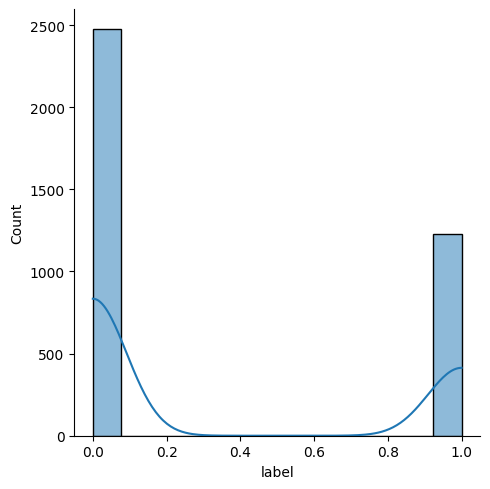

In [38]:
sns.displot(df_reviews['label'], kde=True)

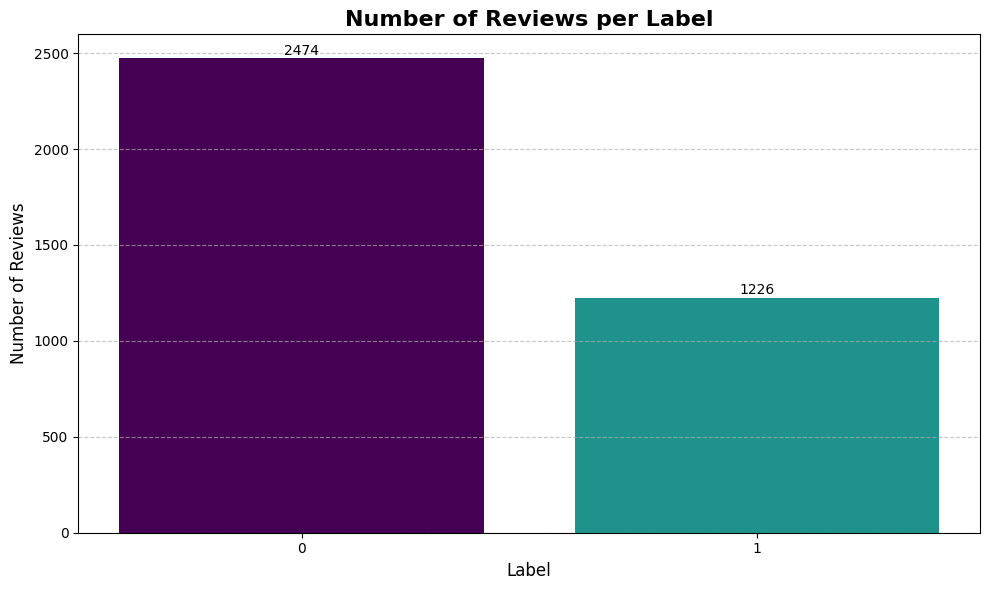

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress font glyph warnings
warnings.filterwarnings("ignore", message="Glyph.*missing.*")

df_reviews['label'] = pd.to_numeric(df_reviews['label'], errors='coerce')
df_reviews = df_reviews.dropna(subset=['label'])
df_reviews['label'] = df_reviews['label'].astype(int)

# Count of how many people gave each rating
rating_counts = df_reviews['label'].value_counts().sort_index()
rating_counts.index = rating_counts.index.astype(str).str.strip()

colors = plt.cm.viridis_r(rating_counts / max(rating_counts))

# bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=10)

# Customize chart appearance
plt.title("Number of Reviews per Label", fontsize=16, weight='bold')
plt.xlabel("Label", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [40]:
positive_review = df_reviews[df_reviews['label'] == 1]
positive_review

,review,label
0,I had only 1 bag with me a carry on trolle...,1
5,Another awful experience by British Airway...,1
10,After the nightmare of getting through tri...,1
12,I flew from Amsterdam to Las Vegas with a ...,1
15,Terrible overall medium service and the flig...,1
...,...,...
3654,My British Airways experience LHR to Paris CDG...,1
3672,Travelled with BA from Rome to LHR Staff at Ro...,1
3679,Booked a British Airways holiday so thats flig...,1
3692,BKKLHREDILHRBKK Outbound flight up to standard...,1


In [41]:
negative_review = df_reviews[df_reviews['label'] == 0]
negative_review

,review,label
1,Check in and security at T5 quick Both Galle...,0
2,Not Verified LHR T5 BA Gold Wing worked well...,0
3,Not Verified Very good service on this route...,0
4,Flight mainly let down by a disagreeable f...,0
6,The service was rude full of attitude to m...,0
...,...,...
3694,LHRMADLHR BA458463 out on A319 GEUOE and retur...,0
3695,LHRLAX and ORDLHR Great crew on both flights T...,0
3696,I flew from Singapore to Heathrow on a B747 wh...,0
3698,LHRYYZ Checked in at 1000am for my 1310 depart...,0


In [81]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords
from collections import Counter


# Download stopwords once
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Extract top bigrams excluding generic or stopword phrases
def extract_clean_bigrams(df, top_k=15):
    all_phrases = []

    for review in df['review'].str.lower():
        tokens = [word for word in tokenizer.tokenize(review) if len(word) > 2]
        filtered = [t for t in tokens if t not in stop_words]
        bigrams = list(ngrams(filtered, 2))
        phrases = [' '.join(gram) for gram in bigrams]
        all_phrases.extend(phrases)

    # Filter out generic phrases manually
    ignore = {'british airways', 'verified review', 'flight london', 'review london', 'via london'}
    filtered_phrases = [p for p in all_phrases if p not in ignore and not any(w in stop_words for w in p.split())]
    return Counter(filtered_phrases).most_common(top_k)

# Extract short review snippets (clean, focused, max 200 chars)
def find_short_snippets(df, bigrams, max_per_phrase=2, max_length=200):
    examples = {}
    for phrase, _ in bigrams:
        matched = []
        pattern = re.compile(rf"\b{re.escape(phrase)}\b", flags=re.IGNORECASE)
        for review in df['review']:
            if pattern.search(review):
                sentences = re.split(r'(?<=[.!?])\s+', review)
                for sentence in sentences:
                    if phrase in sentence.lower():
                        snippet = sentence.strip()
                        if len(snippet) > max_length:
                            snippet = snippet[:max_length].rsplit(' ', 1)[0] + "..."
                        matched.append(snippet)
                        break
            if len(matched) >= max_per_phrase:
                break
        if matched:
            examples[phrase] = matched
    return examples

# ---- Run the Analysis ---- #

# Split by sentiment
pos_reviews = df_reviews[df_reviews['label'] == 1]
neg_reviews = df_reviews[df_reviews['label'] == 0]

# Get top bigrams
top_pos = extract_clean_bigrams(pos_reviews)
top_neg = extract_clean_bigrams(neg_reviews)

# Get review examples for each phrase
pos_examples = find_short_snippets(pos_reviews, top_pos)
neg_examples = find_short_snippets(neg_reviews, top_neg)

# ---- Display Results ---- #

print("\n✅ Positive Review Snippets:")
for phrase, reviews in pos_examples.items():
    print(f"\n🔹 {phrase.title()}:")
    for r in reviews:
        print(f"  - \"{r}\"")

print("\n❌ Negative Review Snippets:")
for phrase, reviews in neg_examples.items():
    print(f"\n🔻 {phrase.title()}:")
    for r in reviews:
        print(f"  - \"{r}\"")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✅ Positive Review Snippets:

🔹 Customer Service:
  - "After the nightmare of getting through triple security at Nairobi Airport I was looking forward to a glass of something lovely to unwind on the plane Fat chance An hour and a half after takeoff we..."
  - "I flew from Amsterdam to Las Vegas with a layover in Heathrow in November 2024 The day we were flying the weather wasnt great Since I was on business I really needed to get to Las Vegas we..."

🔹 London Heathrow:
  - "Although like many these days I avoid BA on long haul from London Heathrow due to my perception of poor service and lack of customer services if things go wrong I was pleasantly surprised by my..."
  - "I have flown British Airways for many years and still do so regularly In one of my last flights this past summer between Paris and Boston British booked me on a connecting flight between Paris and..."

🔹 Business Class:
  - "We booked two business class seat with British Airways in July 2024 for the flight on Septemb

In [69]:
print(df_reviews.columns)


Index(['review', 'label'], dtype='object')


In [71]:
pip install pycountry


   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------ --------------------------------- 1.0/6.3 MB 7.4 MB/s eta 0:00:01
   -------------------------- ------------- 4.2/6.3 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 12.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import pycountry

# Create a set of all country names
country_list = [country.name.lower() for country in pycountry.countries]

def extract_country(text):
    text = text.lower()
    for country in country_list:
        if country in text:
            return country.title()
    return None

# Apply to review column
df_reviews['extracted_country'] = df_reviews['review'].apply(extract_country)

# Get number of unique countries
unique_countries = df_reviews['extracted_country'].nunique()
print(f"Number of Countries (detected from text): {unique_countries}")


Number of Countries (detected from text): 75


In [78]:
avg_rating = df_reviews['label'].mean()
total_reviews = df_reviews.shape[0]
unique_countries = df_reviews['extracted_country'].nunique()

# Display summary
print("FINAL REVIEW SUMMARY")
print(f"⭐ Average Overall Sentiment Rating: {avg_rating:.2f} (0 = Negative, 1 = Positive)")
print(f" Total Number of Reviews Collected: {total_reviews}")
print(f" Number of Countries Represented: {unique_countries}")


FINAL REVIEW SUMMARY
⭐ Average Overall Sentiment Rating: 0.33 (0 = Negative, 1 = Positive)
 Total Number of Reviews Collected: 3700
 Number of Countries Represented: 75


TASK 2


In [83]:
import pandas as pd
cust_book = pd.read_csv(r"C:\Users\DELL\Desktop\Project for Portfolio\British Airways\customer_booking.csv",encoding='latin-1')
cust_book

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [84]:
cust_book
cust_book.head(30)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [85]:
cust_book.info

<bound method DataFrame.info of        num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with explicit encoding

data = pd.read_csv(r"C:\Users\DELL\Desktop\Project for Portfolio\British Airways\customer_booking.csv",encoding='iso-8859-1')

#Explore the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nStatistidcal Summary of the dataset:")
print(data.describe())

# Prepare the dataset
# Handle missing values (if any)
data = data.ffill()

# Encode categorical variable
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature matrix and target vector
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train a machine Learning model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Evaluate the model
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-validation scores:",cv_scores)
print("Mean cross-validation score:",cv_scores.mean())

# Feature importance
feature_importances = model.feature_importances_
features =X.columns
importance_df = pd.DataFrame({'Feature' : features,'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


First few rows of the dataset:
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \


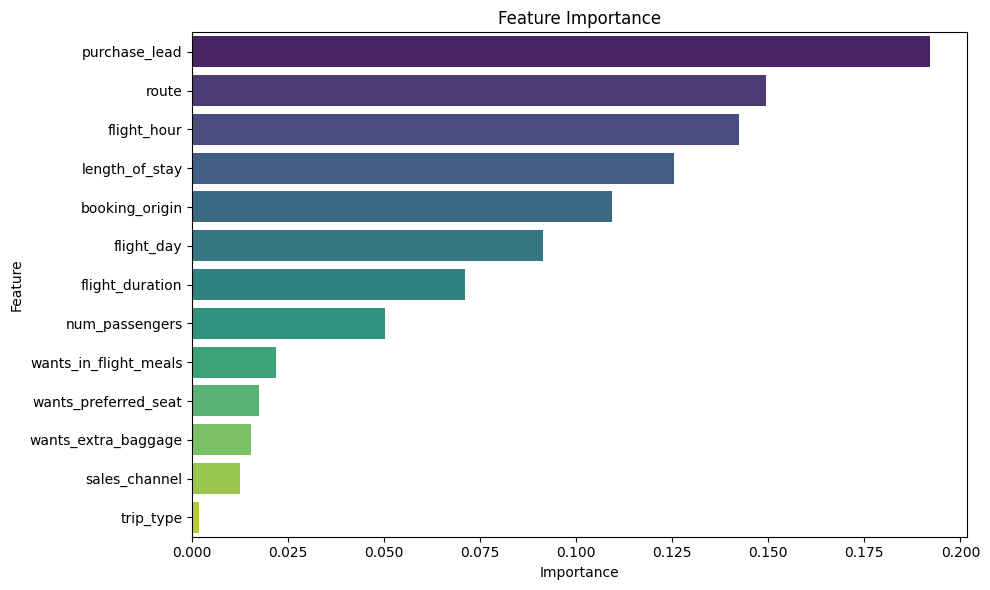

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    hue='Feature',
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()